<h1>1. Problem Definition: How to create a movie recommendation system, based on a list containing movies titles and genres ?</h1>
<h2 style="color:red">Database from Alura</h2>

<h1>2. Data Preparation</h1>

## Getting the data

## Variables:
* movieId (Numerical Variable)
* title (Categorical Variable)
* genres (Categorical Variable)

In [1]:
import pandas as pd

uri_movies = "https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv"
movies = pd.read_csv(uri_movies)
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Some informations

In [2]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


## From 'genres' column create 20 binary columns 

In [3]:
# create new columns
genres = movies.genres.str.get_dummies()

# concat new columns with movies dataframe
movies_data = pd.concat([movies, genres], axis = 1)
movies_data.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Scaling the genres with Standard Scaler

In [4]:
from sklearn.preprocessing import StandardScaler

# create the scaler
scaler = StandardScaler()

# scale the genres
scaled_genres = scaler.fit_transform(genres)

# transform array into a dataframe
scaled_genres = pd.DataFrame(data = scaled_genres,
                             columns = genres.columns)

scaled_genres.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.05918,-0.480607,2.591019,3.865793,3.697524,1.262425,-0.374632,-0.217489,-0.900247,3.392017,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
1,-0.05918,-0.480607,2.591019,-0.258679,3.697524,-0.792126,-0.374632,-0.217489,-0.900247,3.392017,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
2,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,2.259206,-0.334435,-0.491259,-0.20202,-0.132065
3,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,1.110807,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,2.259206,-0.334435,-0.491259,-0.20202,-0.132065
4,-0.05918,-0.480607,-0.385949,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065


# 3. Modeling

## Random Variable

In [5]:
SEED = 42

## Elbow Method -> find the number of clusters to optimize KMeans Model.

### Defining a function that allow calculates the inertia for each number of clusters

In [6]:
from sklearn.cluster import KMeans

def kmeans(n_clusters, genres):
    '''
    Function that receives the number of clusters and the genres dataframe
    and return a list with the inertia(Sum of squared distances of samples 
    to their closest cluster center) for each number of clusters.
    '''
    model = KMeans(n_clusters = n_clusters, random_state=SEED)
    model.fit(genres)
    return [n_clusters, model.inertia_]

### Calculating the inertia for the range of clusters 1 to 40

In [7]:
result = [kmeans(n_clusters, scaled_genres) for n_clusters in range(1, 41)]

result = pd.DataFrame(result,
             columns = ['groups', 'inertia'])
result

,groups,inertia
0,1,194840.000000
1,2,179665.071985
2,3,166516.645372
3,4,155641.130590
4,5,148287.705884
5,6,136762.457752
6,7,126936.438166
7,8,121331.926859
8,9,112959.544257
9,10,104167.717224


### Ploting the groups and inertias

<AxesSubplot:>

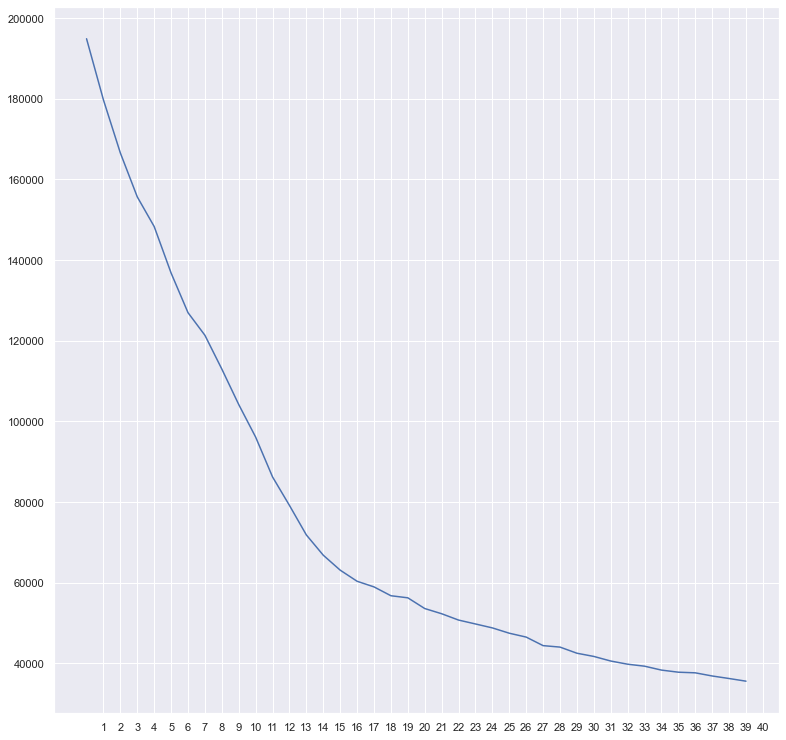

In [8]:
import seaborn as sns
sns.set(rc={'figure.figsize': (13,13)})

result.inertia.plot(xticks = result.groups)

## Create a KMeans model with 16 clusters

In [9]:
# Create the model
model = KMeans(n_clusters = 16, random_state = SEED)

# Compute KMeans clustering
model.fit(scaled_genres)

print(f'Groups: {model.labels_}')

# Centroids
groups = pd.DataFrame(data = model.cluster_centers_, 
            columns = genres.columns)
groups

Groups: [11 15  1 ...  3 11  8]


,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.531664,-0.240152,-0.244586,-0.270451,-0.150957,2.669289,-0.217489,0.222095,-0.248620,-0.094926,-0.322685,-0.128397,-0.188419,-0.249986,-0.310311,-0.273851,0.657045,-0.202020,-0.132065
1,-0.059180,-0.419523,-0.270885,-0.258679,-0.270451,0.466624,-0.329574,-0.217489,0.305393,-0.070447,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,2.259206,-0.249680,-0.414373,-0.202020,-0.132065
2,-0.059180,1.579002,1.367240,-0.253364,-0.270451,-0.535307,-0.362864,-0.217489,-0.620358,0.346584,-0.094926,-0.299750,-0.128397,-0.188419,-0.244509,-0.324254,1.340695,0.378158,-0.202020,-0.132065
3,-0.059180,-0.298837,-0.274552,-0.258679,-0.270451,-0.788150,-0.374632,-0.217489,0.996631,-0.192530,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.240060,0.040194,-0.202020,-0.132065
4,-0.059180,-0.440080,-0.027959,0.563605,0.721543,0.248153,-0.297570,-0.034626,-0.181104,0.265214,-0.094926,-0.260343,-0.128397,5.307322,-0.182736,0.326878,-0.260790,-0.467270,-0.169412,-0.132065
5,16.897616,-0.480607,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.202020,-0.132065
6,-0.059180,-0.333405,-0.317512,-0.163864,-0.270451,-0.744895,1.444723,-0.217489,0.255531,-0.252433,10.534563,-0.257559,-0.128397,-0.188419,0.922484,-0.194188,-0.219795,0.699553,-0.202020,-0.043513
7,-0.059180,-0.456038,-0.357392,-0.238898,-0.260936,-0.599974,-0.338134,4.597924,-0.808616,-0.277127,-0.094926,-0.318096,-0.128397,-0.188419,-0.229602,-0.429675,-0.334435,-0.479140,-0.078470,-0.132065
8,-0.059180,-0.308738,-0.265738,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.313889,-0.130610,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.243622,-0.432739,-0.202020,-0.132065
9,-0.059180,1.026999,1.121377,0.628865,0.482962,-0.441032,-0.162713,0.026329,-0.492945,0.801904,-0.094926,-0.081328,7.788339,0.089846,-0.088586,-0.288731,0.970137,0.068485,-0.071589,-0.034545


### Plot KMeans Centroids

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>,
       <AxesSubplot:title={'center':'2'}>,
       <AxesSubplot:title={'center':'3'}>,
       <AxesSubplot:title={'center':'4'}>,
       <AxesSubplot:title={'center':'5'}>,
       <AxesSubplot:title={'center':'6'}>,
       <AxesSubplot:title={'center':'7'}>,
       <AxesSubplot:title={'center':'8'}>,
       <AxesSubplot:title={'center':'9'}>,
       <AxesSubplot:title={'center':'10'}>,
       <AxesSubplot:title={'center':'11'}>,
       <AxesSubplot:title={'center':'12'}>,
       <AxesSubplot:title={'center':'13'}>,
       <AxesSubplot:title={'center':'14'}>,
       <AxesSubplot:title={'center':'15'}>], dtype=object)

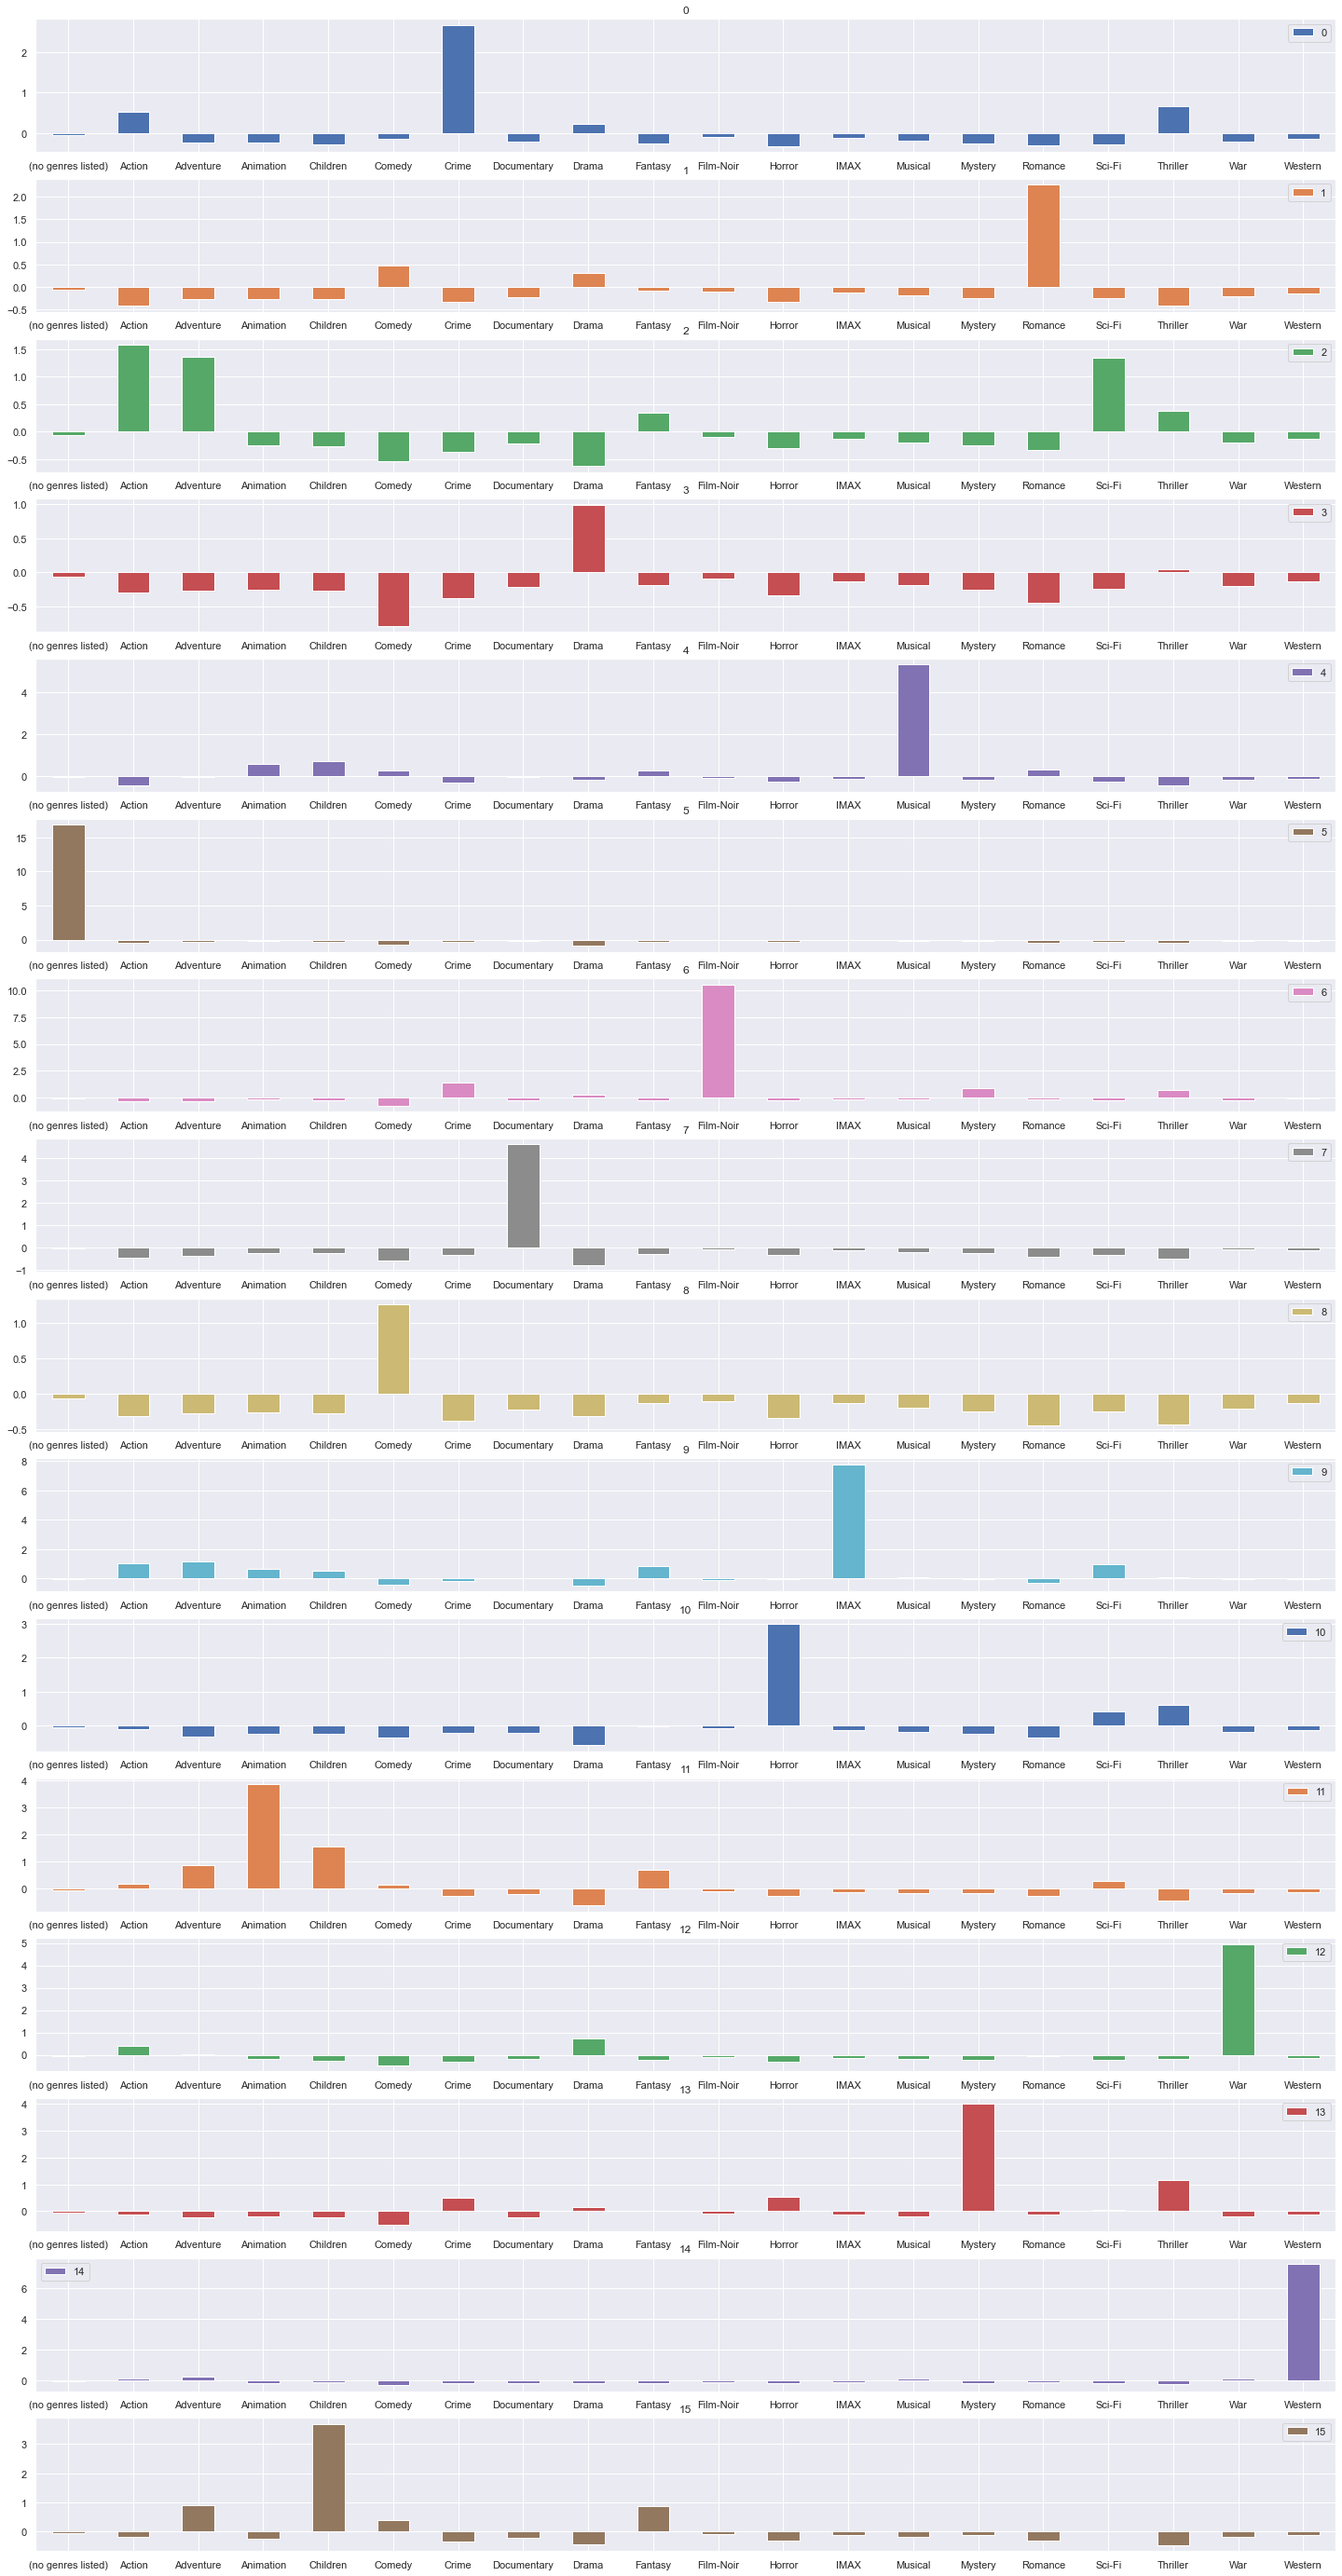

In [10]:
groups.transpose().plot.bar(subplots = True,
                            figsize = (25, 50),
                            sharex = False, 
                            rot = 0)

### Verify the movies in the group 1

In [11]:
group = 1

filter = model.labels_ == group

movies_data[filter].sample(5)

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2377,3155,Anna and the King (1999),Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3100,4160,"Widow of St. Pierre, The (Veuve de Saint-Pierr...",Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7075,69757,(500) Days of Summer (2009),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
7997,97024,Rust and Bone (De rouille et d'os) (2012),Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7692,89678,Northanger Abbey (2007),Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Plot a dendrogram with KMeans clusters

{'icoord': [[145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [115.0, 115.0, 133.75, 133.75],
  [105.0, 105.0, 124.375, 124.375],
  [95.0, 95.0, 114.6875, 114.6875],
  [85.0, 85.0, 104.84375, 104.84375],
  [75.0, 75.0, 94.921875, 94.921875],
  [65.0, 65.0, 84.9609375, 84.9609375],
  [55.0, 55.0, 74.98046875, 74.98046875],
  [45.0, 45.0, 64.990234375, 64.990234375],
  [35.0, 35.0, 54.9951171875, 54.9951171875],
  [25.0, 25.0, 44.99755859375, 44.99755859375],
  [15.0, 15.0, 34.998779296875, 34.998779296875],
  [5.0, 5.0, 24.9993896484375, 24.9993896484375]],
 'dcoord': [[0.0, 2.479920416025655, 2.479920416025655, 0.0],
  [0.0, 2.8870515264305134, 2.8870515264305134, 2.479920416025655],
  [0.0, 3.3711897040431476, 3.3711897040431476, 2.8870515264305134],
  [0.0, 3.437932800528166, 3.437932800528166, 3.3711897040431476],
  [0.0, 3.822759038931129, 3.822759038931129, 3.437932800528166],
  [0.0, 4.3599463344837925, 4.3599463344837925, 3.822759038

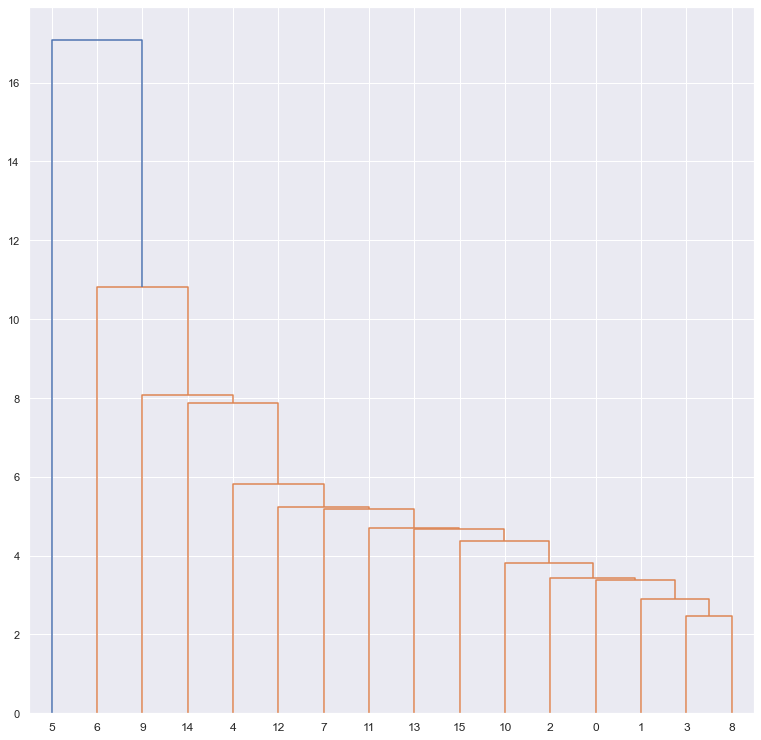

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

# distance matrix
distance_matrix = linkage(groups)

# dendrogram
dendrogram = dendrogram(distance_matrix)
dendrogram

### Dimensionality Reduction to plot the genres

<AxesSubplot:>

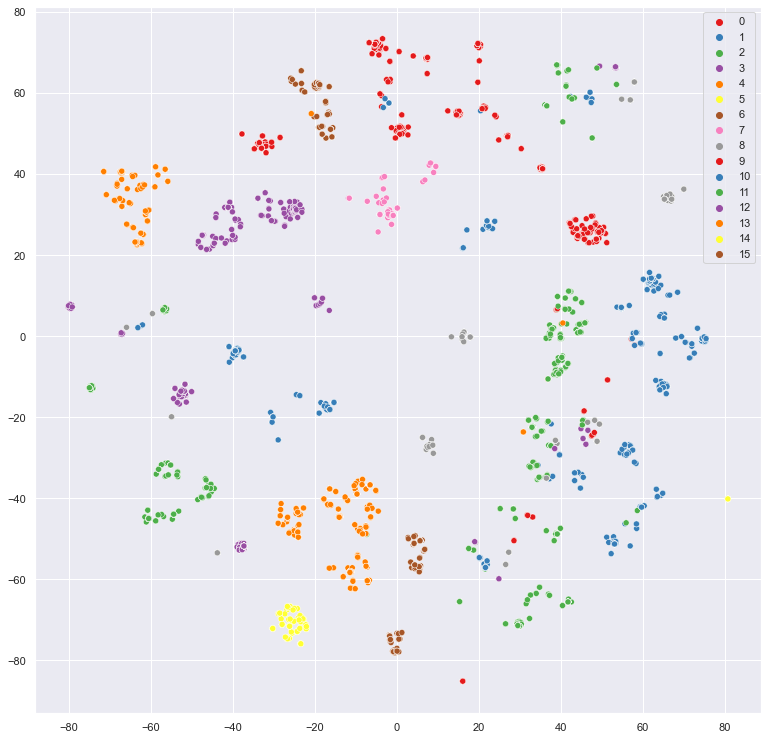

In [13]:
from sklearn.manifold import TSNE
import seaborn as sns

# reduce the dimension (16 to 2 dimensions)
tsne = TSNE(random_state = SEED)
visualization = tsne.fit_transform(scaled_genres)

# plot the new data
sns.scatterplot(x = visualization[:,0],
                y = visualization[:, 1],
                hue = model.labels_,
                palette = sns.color_palette('Set1', 16))

## Create a Agglomerative Clustering model - Hierarchical clustering

In [14]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters = 16)
groups = model.fit_predict(scaled_genres)
groups

array([ 5, 14, 13, ...,  0,  5,  0], dtype=int64)

### Dimensionality Reduction to plot the genres

<AxesSubplot:>

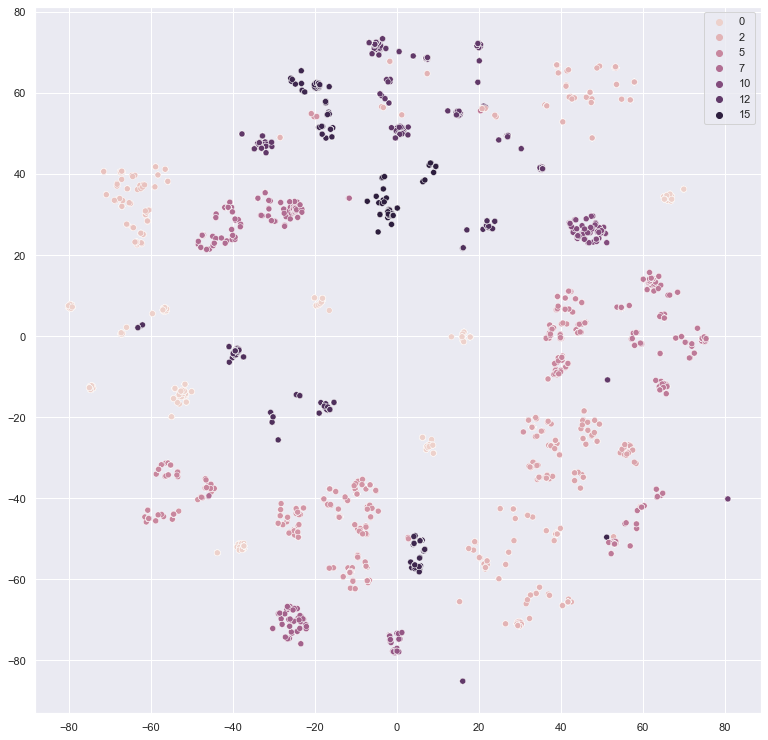

In [15]:
# reduce the dimension (16 to 2 dimensions)
tsne = TSNE(random_state = SEED)
visualization = tsne.fit_transform(scaled_genres)

# plot the new data
sns.scatterplot(x = visualization[:, 0],
                y = visualization[:, 1],
                hue = groups)